In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip 'house-prices-advanced-regression-techniques.zip'

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 77.4MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!unzip 'house-prices-advanced-regression-techniques.zip'

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
txt = open("data_description.txt", mode="r")
print(txt.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_sample = pd.read_csv('sample_submission.csv')

 Analisis exploratorio basado en Hair et al. (2013), el capitulo 'Examining your data'

* Comprende el problema. Veremos cada variable y haremos un análisis sobre su significado e importancia para este problema. **salesPrice**
* Estudio univariable. Solo nos centraremos en la variable dependiente ('Precio de venta') e intentaremos saber un poco más al respecto.
* Estudio multivariado.
Intentaremos entender cómo se relacionan la variable dependiente y las variables independientes.
* Limpieza básica. Limpiaremos el conjunto de datos y manejaremos los datos faltantes, los valores atípicos y las variables categóricas.
* Suposiciones de prueba. Verificaremos si nuestros datos cumplen con los supuestos requeridos por la mayoría de las técnicas multivariadas.

In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

sesgo positivo.
Normal/ gausseana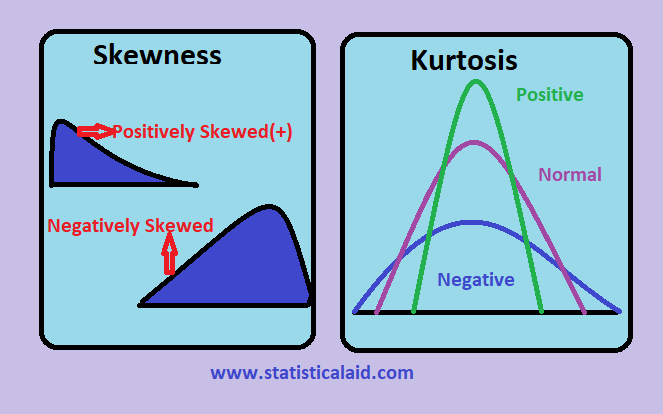

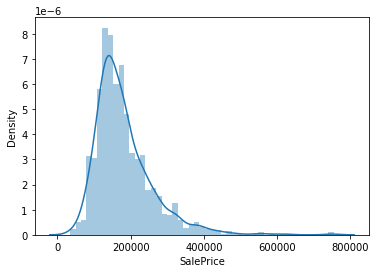

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'GrLivArea' , 'TotalBsmtSF', 'OverallQual' y 'YearBuilt'. ** Caracteristicas en común **

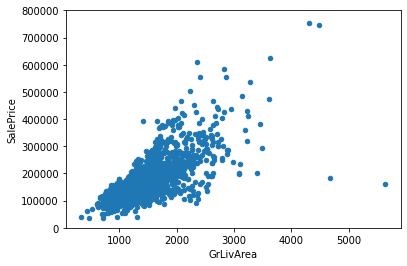

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea' # Pies cuadrados de superficie habitable sobre el nivel del suelo (suelo)
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

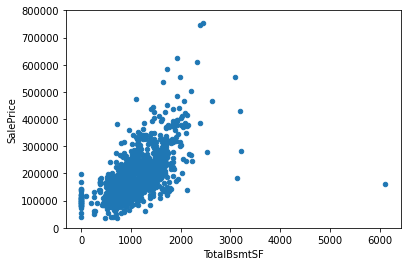

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF' # total de superficie
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

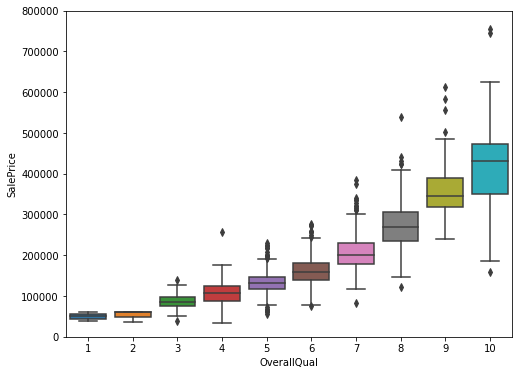

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual' #Valora el material general y el acabado de la casa
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

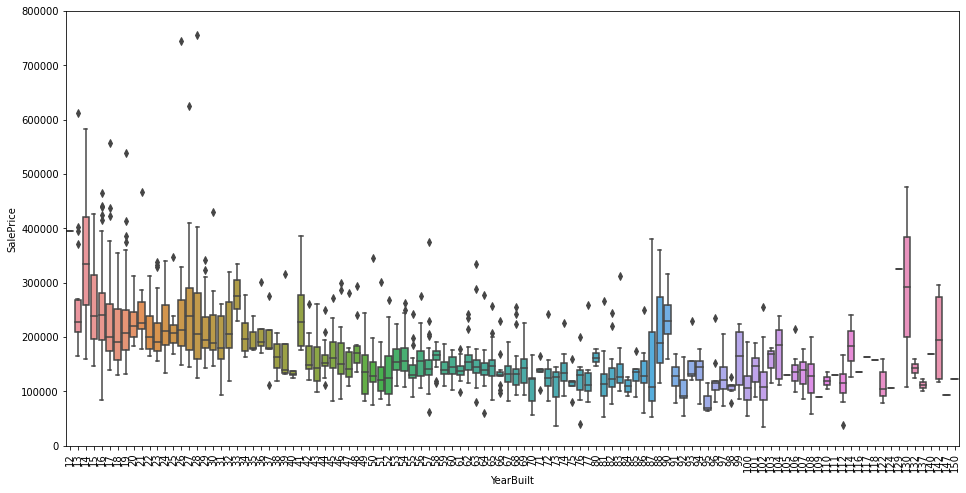

In [ ]:
var = 'YearBuilt' # Antiguedad
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

* Matriz de correlación (estilo mapa de calor).
* Matriz de correlación 'SalePrice' (estilo de mapa de calor ampliado).
* Gráficos de dispersión entre las variables más correlacionadas (mover como el estilo de Jagger).

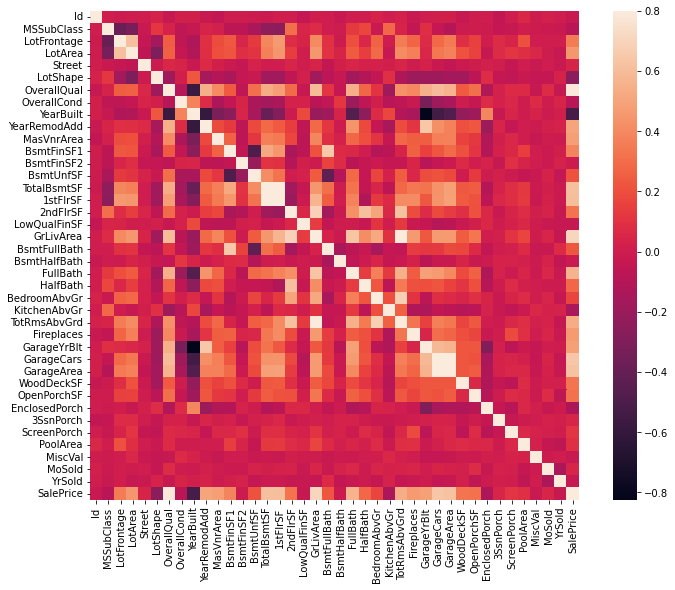

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

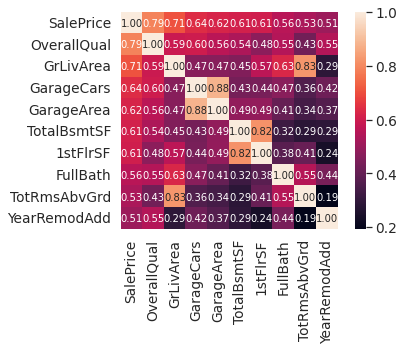

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están fuertemente correlacionados con 'SalePrice'. 
* 'GarageCars' y 'GarageArea' también son algunas de las variables más fuertemente correlacionadas. **La cantidad de automóviles que caben en el garaje es una consecuencia del área del garaje.**
* 'GarageCars' y 'GarageArea' casi iguales.
* 'TotalBsmtSF' y '1stFloor' relacion de primer baño al tamaño
* 'TotRmsAbvGrd' y 'GrLivArea', gemelos.

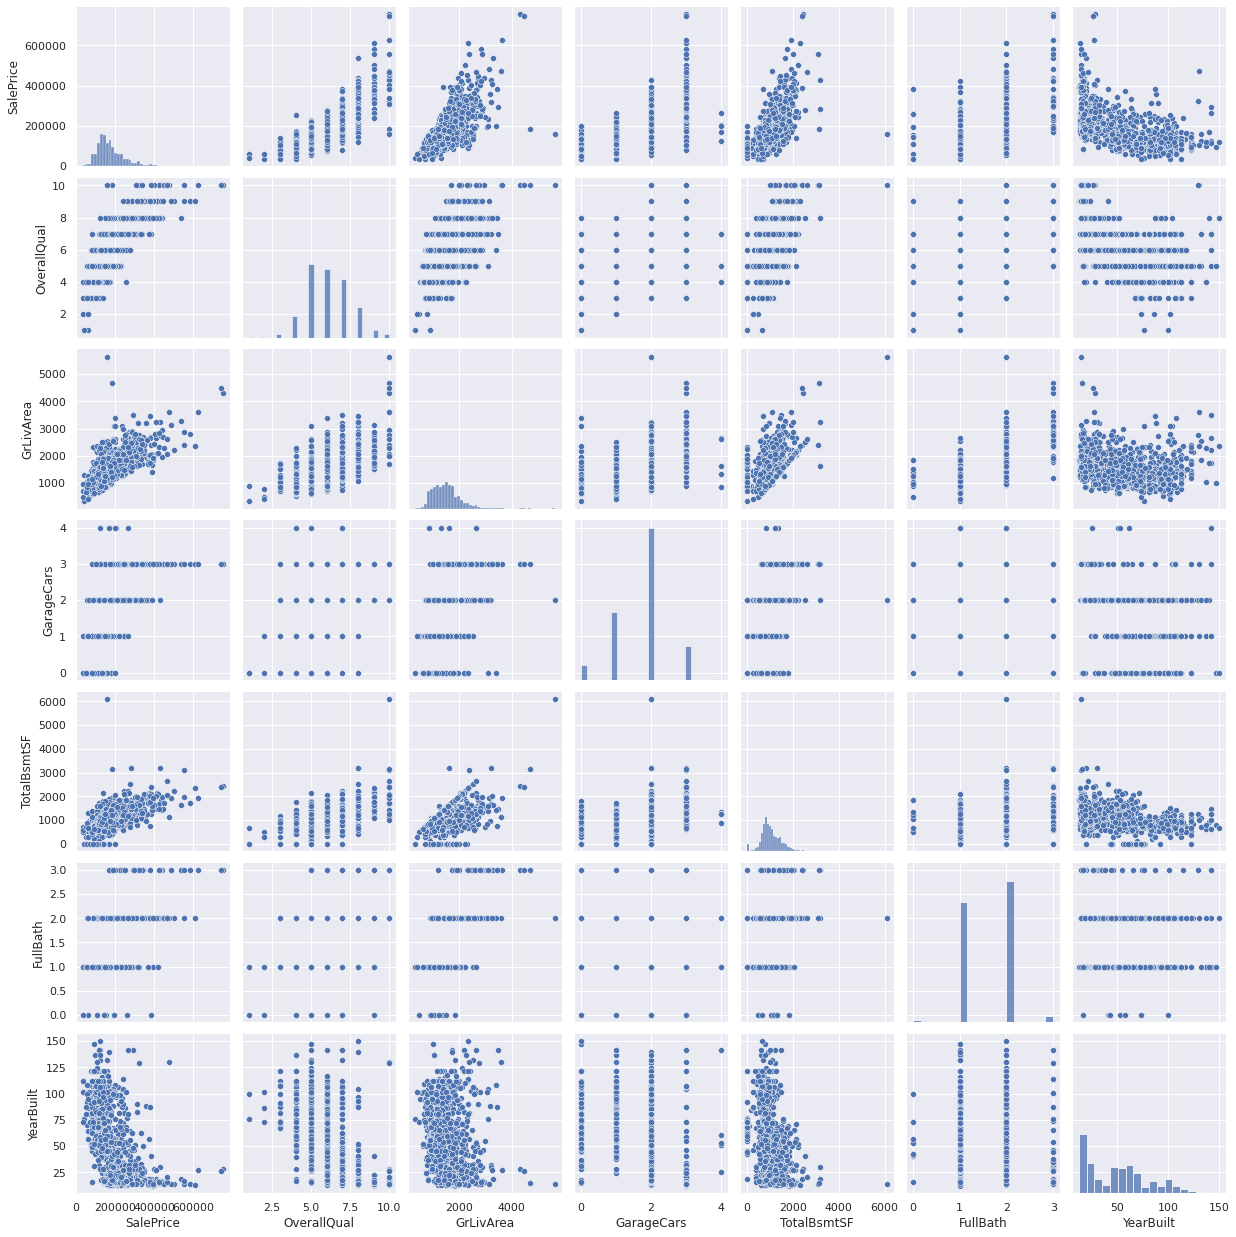

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Prevalencia de datos faltantes y patrones

* cuando falta más del 15% de los datos, debemos eliminar la variable correspondiente y pretender que nunca existió.
 'PoolQC','MiscFeature', 'Alley'


* 'Electrical'. Como es solo una observación,
eliminaremos esta observación y mantendremos la variable.


In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing..

0

Estandarizamos datos

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


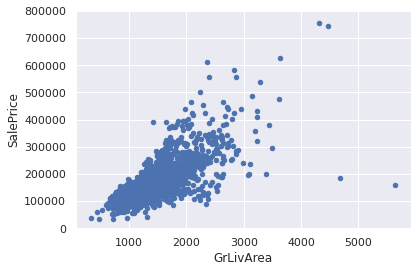

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

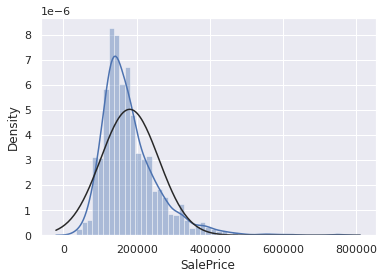

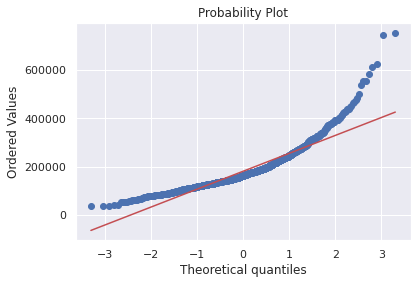

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Según Cabello et al. (2013), se deben probar cuatro supuestos:

* normalidad -
Cuando hablamos de normalidad, lo que queremos decir es que los datos deberían verse como una distribución normal.
Recuerde que la normalidad univariante no asegura la normalidad multivariante (que es lo que nos gustaría tener), pero ayuda. Otro detalle a tener en cuenta es que en muestras grandes (>200 observaciones) la normalidad no es un problema. Sin embargo, si solucionamos la normalidad, evitamos muchos otros problemas (p.
heteroscedacidad), por lo que esa es la razón principal por la que estamos haciendo este análisis.

* Homocedasticidad: 'suposición de que la(s) variable(s) dependiente(s) exhibe(n) niveles iguales de varianza en el rango de la(s) variable(s) predictora(s)' 

* Linealidad: examinar diagramas de dispersión y buscar patrones lineales. 

* Ausencia de errores correlacionados: cuando un error está correlacionado con otro. 

In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

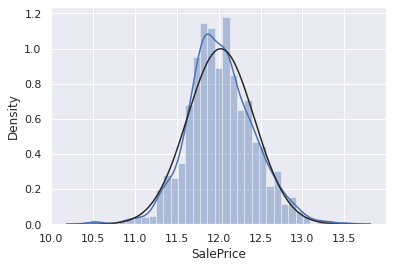

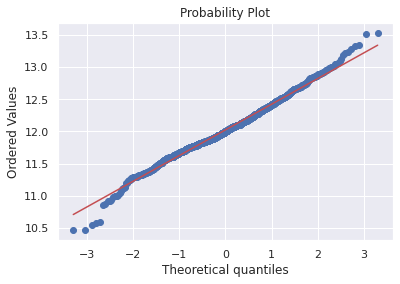

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

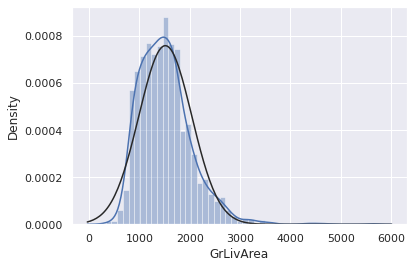

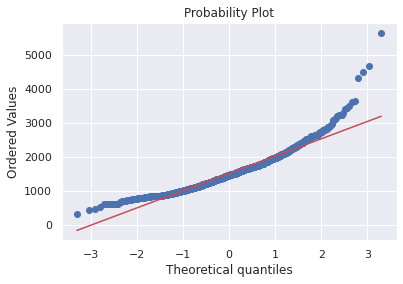

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

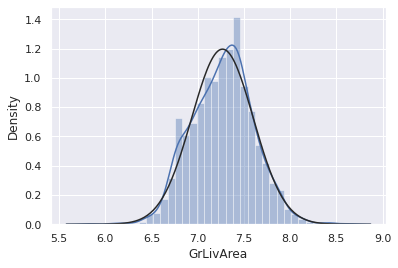

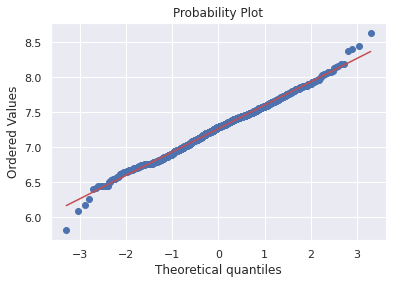

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

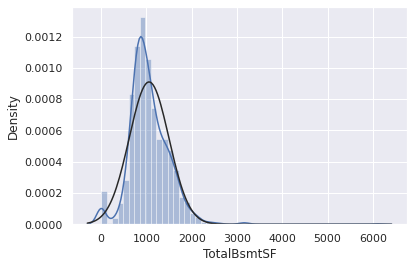

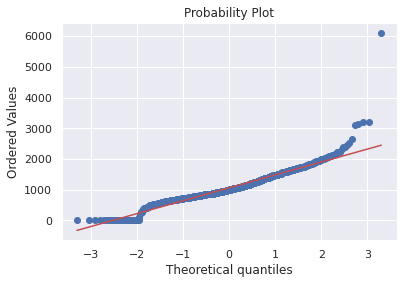

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

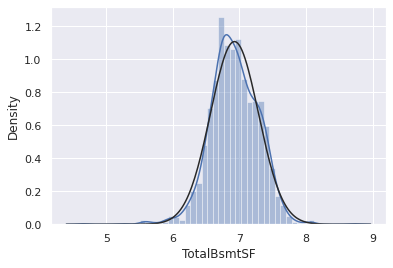

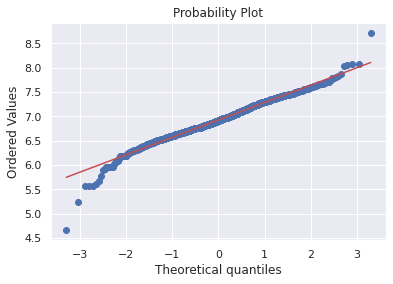

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

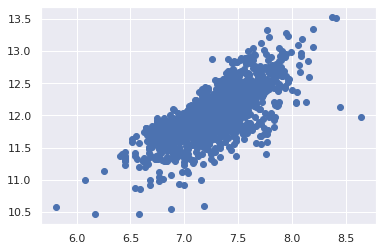

In [ ]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

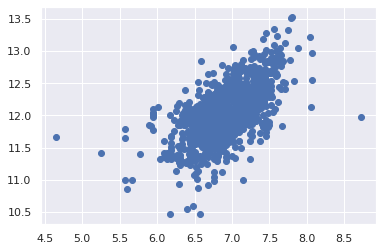

In [ ]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

* 'SalePrice' presenta niveles iguales de varianza en el rango de 'TotalBsmtSF'

In [ ]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)